# This is our final project, it will be divided into 3 sections representing the 3 datasets that we will be working with (2small & 1big dataset)

# Outline

What problem and data sets did you work on?
○ What are the important ideas/methods you explored?
○ What ideas from the class did you use?
○ Reporting the results (cross-validation, easy-to-read figures, etc)
○ Do the results make sense?
○ If you had much more time, how would you continue the project?



## What problem and data sets did you work on?

## What are the important ideas/methods you explored?

## What ideas from the class did you use?

## Reporting the results (cross-validation, easy-to-read figures, etc)

## Do the results make sense?

## If you had much more time, how would you continue the project?

# All libraries and functions needed to perform regression and classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
import scipy.optimize as opt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline


def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))
    
def cost(theta, X, y):
    theta = np.matrix(theta) # make sure theta is a column or row vector! 
    X = np.matrix(X)
    y = np.matrix(y)
    out = sigmoid(X*theta.T)
    
    # first part of the cost function
    first = np.multiply(-y,np.log(out))
    
    # second part of cost function 
    second = np.multiply((1-y),np.log(1-out))
    return np.sum(first - second) / (len(X))

def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    # find each entry of the gradient vector
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term)
    
    return grad

## Dataset 1 (Small Dataset)

In [78]:
# SVM for dataset wine

from sklearn import svm
from sklearn.datasets import load_wine
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# features, target = load_wine(return_X_y=True)
data = load_wine()
#print(data)
df = pd.DataFrame(data=data['data'],columns=data['feature_names'])
df['target']=data['target']
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/Brett/anaconda3/lib/python3.6/site-packages/sklearn/datasets/data/wine_data.csv'

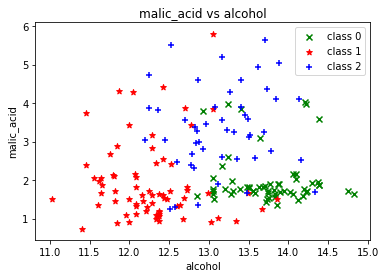

In [72]:

df['class']=df['target'].map(lambda ind: data['target_names'][ind])
x = df['alcohol']
y = df['malic_acid']

first_x = x[df['class'] == 'class_0']
first_y = y[df['class'] == 'class_0']

second_x = x[df['class'] == 'class_1']
second_y = y[df['class'] == 'class_1']

third_x = x[df['class'] == 'class_2']
third_y = y[df['class'] == 'class_2']

first = plt.scatter(first_x,first_y,marker='x',color='green')
second = plt.scatter(second_x,second_y,marker='*',color='red')
third = plt.scatter(third_x,third_y,marker='+',color='blue')
plt.title('malic_acid vs alcohol')
plt.legend((first, second, third), ('class 0', 'class 1', 'class 2'))
plt.xlabel('alcohol')
plt.ylabel('malic_acid')
plt.show()

In [75]:

x = df['alcohol']
y = df['total_phenols']

first_x = x[df['class'] == 'class_0']
first_y = y[df['class'] == 'class_0']

second_x = x[df['class'] == 'class_1']
second_y = y[df['class'] == 'class_1']

third_x = x[df['class'] == 'class_2']
third_y = y[df['class'] == 'class_2']

first = plt.scatter(first_x,first_y,marker='x',color='green')
second = plt.scatter(second_x,second_y,marker='*',color='red')
third = plt.scatter(third_x,third_y,marker='+',color='blue')
plt.title('alcohol vs total_phenols')
plt.legend((first, second, third), ('class 0', 'class 1', 'class 2'))
plt.xlabel('alcohol')
plt.ylabel('total_phenols')
plt.show()

KeyError: 'class'

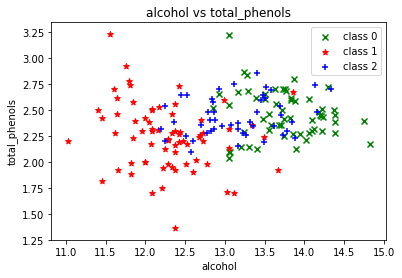

In [59]:
x = df['alcohol']
y = df['ash']

first_x = x[df['class'] == 'class_0']
first_y = y[df['class'] == 'class_0']

second_x = x[df['class'] == 'class_1']
second_y = y[df['class'] == 'class_1']

third_x = x[df['class'] == 'class_2']
third_y = y[df['class'] == 'class_2']

first = plt.scatter(first_x,first_y,marker='x',color='green')
second = plt.scatter(second_x,second_y,marker='*',color='red')
third = plt.scatter(third_x,third_y,marker='+',color='blue')
plt.title('alcohol vs total_phenols')
plt.legend((first, second, third), ('class 0', 'class 1', 'class 2'))
plt.xlabel('alcohol')
plt.ylabel('total_phenols')
plt.show()

In [74]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

target = df['class']
dropDf = df
dropDf = dropDf.drop(['class'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(dropDf, target, train_size=0.9)
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

pca = PCA(n_components=2).fit(x_train)
pca_2d = pca.transform(x_train)

clf = SVC(kernel='linear')
clf.fit(x_train,y_train)
svmClassifier_2d = clf.fit(x_train,y_train)

for i in range(0, pca_2d.shape[0]):
    if y_train[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',    s=50,marker='+')
    elif y_train[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',    s=50,marker='o')
    elif y_train[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',    s=50,marker='*')

scaler = StandardScaler()
X_std = scaler.fit_transform(dropDf)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test,y_pred))

KeyError: 'class'

In [62]:
print(y_test[0:5])
print(y_pred[0:5])


NameError: name 'plot_decision_regions' is not defined

## What are the important ideas/methods you explored?
#### Using svm to identify which class of wine each row of data is. 

## What ideas from the class did you use?
#### The way to approach setting up a jupyter notebook and the libraries that we should use.

## Do the results make sense?
## If you had much more time, how would you continue the project?

## Dataset 2 (Small Dataset)

We chose *nameofthedataset* for the second part

## Dataset 3 (Large Dataset)

We chose the Los Angeles Parkin-Citation Dataset which is 

In [ ]:
#data.hist(bins=50,figsize=(15,10))

In [ ]:
#plt.figure(figsize=(15,10))
#plt.scatter(data['Longitude'].astype(int),data['Latitude'].astype(int),c=data['Fine amount'].astype(int),cmap='Blues')
#plt.colorbar()
#plt.xlabel('longitude')
#plt.ylabel('latitude')
#plt.title('Median income on basis of geo-coordinates')
#plt.show()

In [19]:
data['Violation Description'].value_counts()


NO PARK/STREET CLEAN              2687717
METER EXP.                        1607275
RED ZONE                           690121
PREFERENTIAL PARKING               641401
DISPLAY OF TABS                    570599
NO PARKING                         411646
DISPLAY OF PLATES                  257654
WHITE ZONE                         206802
PARKED OVER TIME LIMIT             170597
NO STOP/STANDING                   167356
PARKED OVER TIME LIM               136715
STANDNG IN ALLEY                   130504
BLOCKING DRIVEWAY                  116588
STOP/STAND PROHIBIT                101690
YELLOW ZONE                         96851
NO STOP/STAND                       94326
PARKED ON SIDEWALK                  84971
NO EVIDENCE OF REG                  82679
18 IN. CURB/2 WAY                   81736
EXCEED 72HRS-ST                     79803
FIRE HYDRANT                        73437
DOUBLE PARKING                      62221
NO STOPPING/ANTI-GRIDLOCK ZONE      59862
OUTSIDE LINES/METER               

In [121]:
from sklearn.datasets import fetch_california_housing

caliHouse = fetch_california_housing()


In [122]:
data = caliHouse.data


In [123]:
data.shape

(20640, 8)

In [124]:
data = caliHouse.data
target = caliHouse.target
featureNames = caliHouse.feature_names
description = caliHouse.DESCR

In [140]:
#No Outliers
print(df.isnull().sum())

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64


In [125]:
print(featureNames)
print(description)


['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row pe

In [126]:
dataFrame = pd.DataFrame(data,columns=featureNames)

In [127]:
dataFrame.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [128]:
dataFrame.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


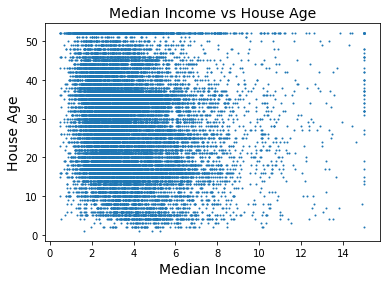

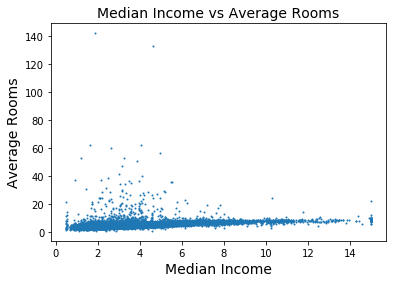

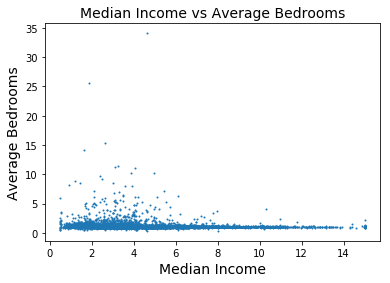

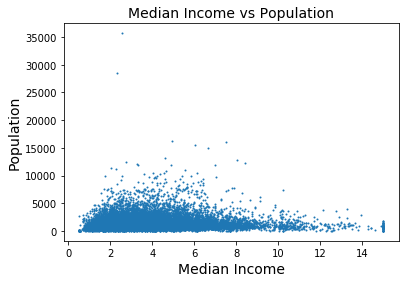

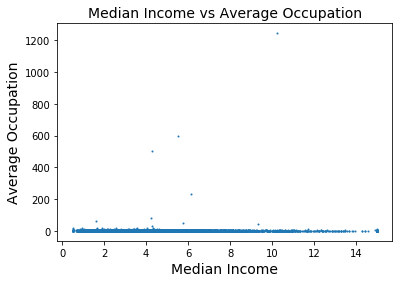

In [129]:
plt.scatter(dataFrame['MedInc'],dataFrame['HouseAge'],s=1)
plt.title('Median Income vs House Age', fontsize=14)
plt.xlabel('Median Income', fontsize=14)
plt.ylabel('House Age', fontsize=14)
plt.show()
plt.scatter(dataFrame['MedInc'],dataFrame['AveRooms'],s=1)
plt.title('Median Income vs Average Rooms', fontsize=14)
plt.xlabel('Median Income', fontsize=14)
plt.ylabel('Average Rooms', fontsize=14)
plt.show()
plt.scatter(dataFrame['MedInc'],dataFrame['AveBedrms'],s=1)
plt.title('Median Income vs Average Bedrooms', fontsize=14)
plt.xlabel('Median Income', fontsize=14)
plt.ylabel('Average Bedrooms', fontsize=14)
plt.show()
plt.scatter(dataFrame['MedInc'],dataFrame['Population'],s=1)
plt.title('Median Income vs Population', fontsize=14)
plt.xlabel('Median Income', fontsize=14)
plt.ylabel('Population', fontsize=14)
plt.show()
plt.scatter(dataFrame['MedInc'],dataFrame['AveOccup'],s=1)
plt.title('Median Income vs Average Occupation', fontsize=14)
plt.xlabel('Median Income', fontsize=14)
plt.ylabel('Average Occupation', fontsize=14)
plt.show()

In [144]:
outliers = []
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

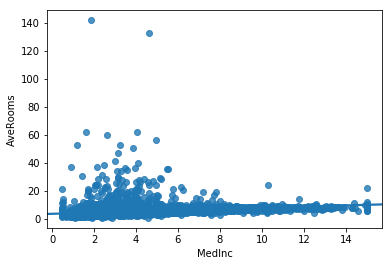

In [177]:
outlier_data1 = detect_outlier(dataFrame["AveRooms"])
#print(outlier_data)
data_set_clean1 = dataFrame[dataFrame["AveRooms"]<15]
#print(outlier_data)
sns.regplot(x=data_set_clean["MedInc"], y=data_set_clean["AveRooms"])

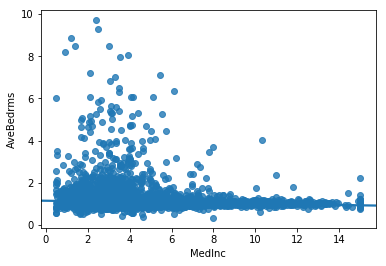

In [150]:
outlier_data = detect_outlier(dataFrame["AveBedrms"])
#print(outlier_data)
data_set_clean = dataFrame[dataFrame["AveBedrms"]<10]
#print(outlier_data)
sns.regplot(x=data_set_clean["MedInc"], y=data_set_clean["AveBedrms"])

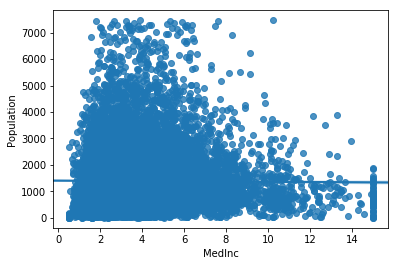

In [151]:
outlier_data = detect_outlier(dataFrame["Population"])
#print(outlier_data)
data_set_clean = dataFrame[dataFrame["Population"]<7500]
#print(outlier_data)
sns.regplot(x=data_set_clean["MedInc"], y=data_set_clean["Population"])

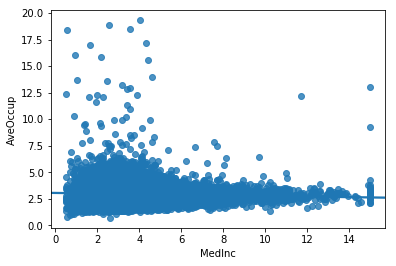

In [154]:
outlier_data = detect_outlier(dataFrame["AveOccup"])
#print(outlier_data)
data_set_clean = dataFrame[dataFrame["AveOccup"]<20]
#print(outlier_data)
sns.regplot(x=data_set_clean["MedInc"], y=data_set_clean["AveOccup"])

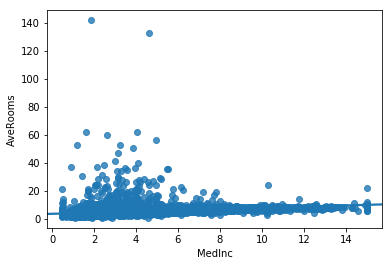

In [156]:
sns.regplot(x=dataFrame["MedInc"], y=dataFrame["AveRooms"])

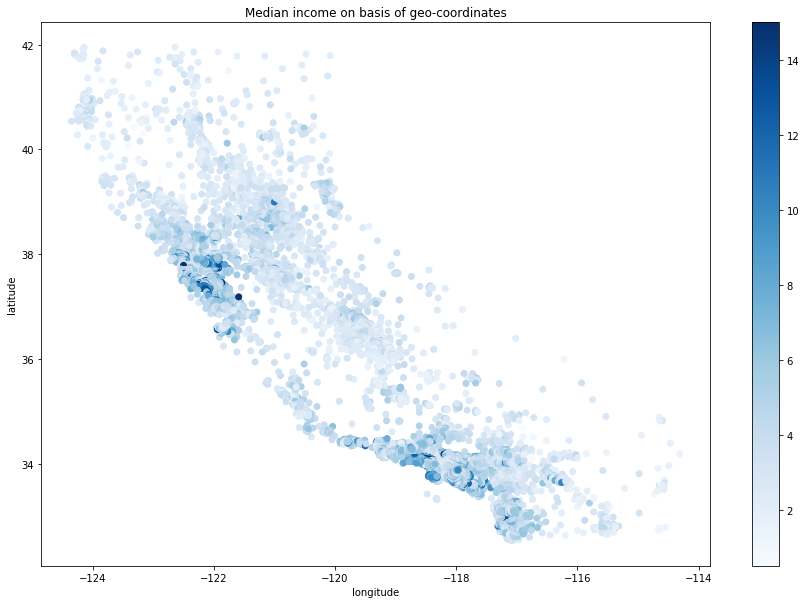

In [176]:
plt.figure(figsize=(15,10))
plt.scatter(dataFrame['Longitude'],dataFrame['Latitude'],c=dataFrame['MedInc'],cmap='Blues')
plt.colorbar()
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Median income on basis of geo-coordinates')
plt.show()

In [188]:
x = data_set_clean1[['AveBedrms','Population']]
y = data_set_clean1['MedInc']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [189]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [190]:
print(regr.intercept_)

5.7173433153184945


In [191]:
regr.coef_

array([-1.72195771e+00, -6.11404166e-06])

In [192]:
predictions = regr.predict(x_test)
print(x_test[0:5])
print(predictions[0:5])

       AveBedrms  Population
6046    1.004938      3367.0
4612    1.030651       634.0
17787   1.047337      3036.0
4297    1.071661      1941.0
5220    1.071006      1938.0
[3.96629613 3.93872899 3.89531058 3.86012063 3.86126741]


In [193]:
print(regr.score(x,y))

0.02140921471345092
